In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os 


# Ghibli-Style AI Art Trends 2025

In [6]:
df = pd.read_csv("C:/Users/tfsam/Desktop/ongoing/ai_ghibli_trend_dataset_v2.csv")

In [7]:
df.head()


,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7d66c67f-0d11-4ef9-895c-d865ef11fe40,523b8706,Ghibli-style village at sunset,2965,1361,417,Reddit,11.11,81,2808,1024x1024,92,Yes,No,2025-03-11,Absolutely stunning! Love the details. 🎨 #5729
2,d7978afd-3932-4cce-9a21-5f9bf2bc1f64,0e02592a,A lone traveler exploring an enchanted ruin,4727,655,785,Instagram,5.56,41,1800,2048x2048,61,No,No,2025-03-06,Is this AI or hand-painted? Incredible! #8001
3,cb34636a-a15c-4b15-999c-759dbb8896fe,9ed78a42,Spirited Away-style bustling market street,1629,1954,212,TikTok,12.45,88,479,2048x2048,76,No,No,2025-03-23,Is this AI or hand-painted? Incredible! #5620
4,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               500 non-null    object 
 1   user_id                500 non-null    object 
 2   prompt                 500 non-null    object 
 3   likes                  500 non-null    int64  
 4   shares                 500 non-null    int64  
 5   comments               500 non-null    int64  
 6   platform               500 non-null    object 
 7   generation_time        500 non-null    float64
 8   gpu_usage              500 non-null    int64  
 9   file_size_kb           500 non-null    int64  
 10  resolution             500 non-null    object 
 11  style_accuracy_score   500 non-null    int64  
 12  is_hand_edited         500 non-null    object 
 13  ethical_concerns_flag  500 non-null    object 
 14  creation_date          500 non-null    object 
 15  top_co

In [9]:
df.describe()

,likes,shares,comments,generation_time,gpu_usage,file_size_kb,style_accuracy_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2601.262000,1040.182000,506.872000,8.317780,61.124000,2511.822000,74.626000
std,1429.433498,562.668738,283.384066,3.903103,18.151131,1390.178578,14.679001
min,105.000000,13.000000,5.000000,1.540000,30.000000,101.000000,50.000000
25%,1343.500000,587.750000,276.750000,5.027500,45.000000,1374.750000,62.000000
50%,2566.500000,1092.000000,518.000000,8.380000,63.000000,2498.000000,74.000000
75%,3913.250000,1502.000000,744.250000,11.540000,77.000000,3729.000000,87.250000
max,4944.000000,1999.000000,998.000000,14.990000,90.000000,4973.000000,100.000000


In [10]:
df.isnull().sum()

image_id                 0
user_id                  0
prompt                   0
likes                    0
shares                   0
comments                 0
platform                 0
generation_time          0
gpu_usage                0
file_size_kb             0
resolution               0
style_accuracy_score     0
is_hand_edited           0
ethical_concerns_flag    0
creation_date            0
top_comment              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(500, 16)

In [13]:
df.dtypes

image_id                  object
user_id                   object
prompt                    object
likes                      int64
shares                     int64
comments                   int64
platform                  object
generation_time          float64
gpu_usage                  int64
file_size_kb               int64
resolution                object
style_accuracy_score       int64
is_hand_edited            object
ethical_concerns_flag     object
creation_date             object
top_comment               object
dtype: object

In [14]:
#Data Visulization

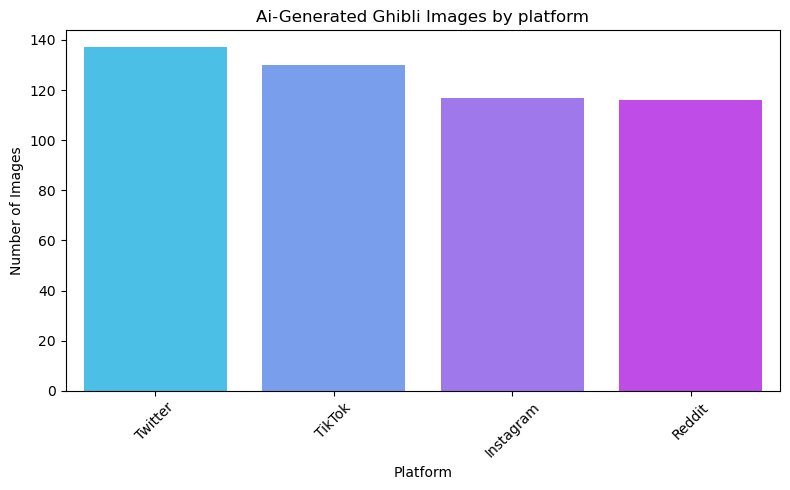

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index, palette='cool')
plt.title('Ai-Generated Ghibli Images by platform')
plt.xlabel('Platform')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import plotly.express as px


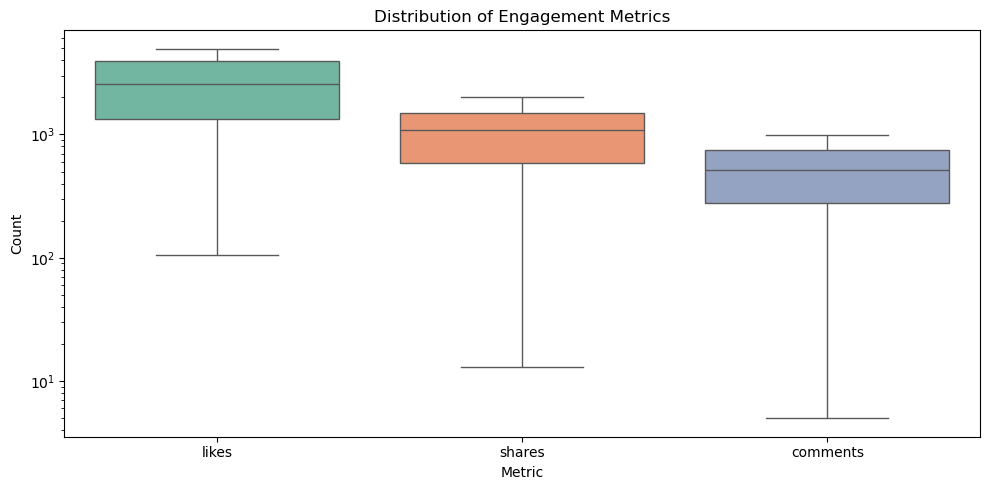

In [17]:
engagement_cols = ['likes', 'shares', 'comments']
df_long = df.melt(value_vars=engagement_cols, var_name='Metric', value_name='Count')

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_long, x='Metric', y='Count', palette="Set2")
plt.yscale('log')
plt.title('Distribution of Engagement Metrics')
plt.tight_layout()
plt.show()

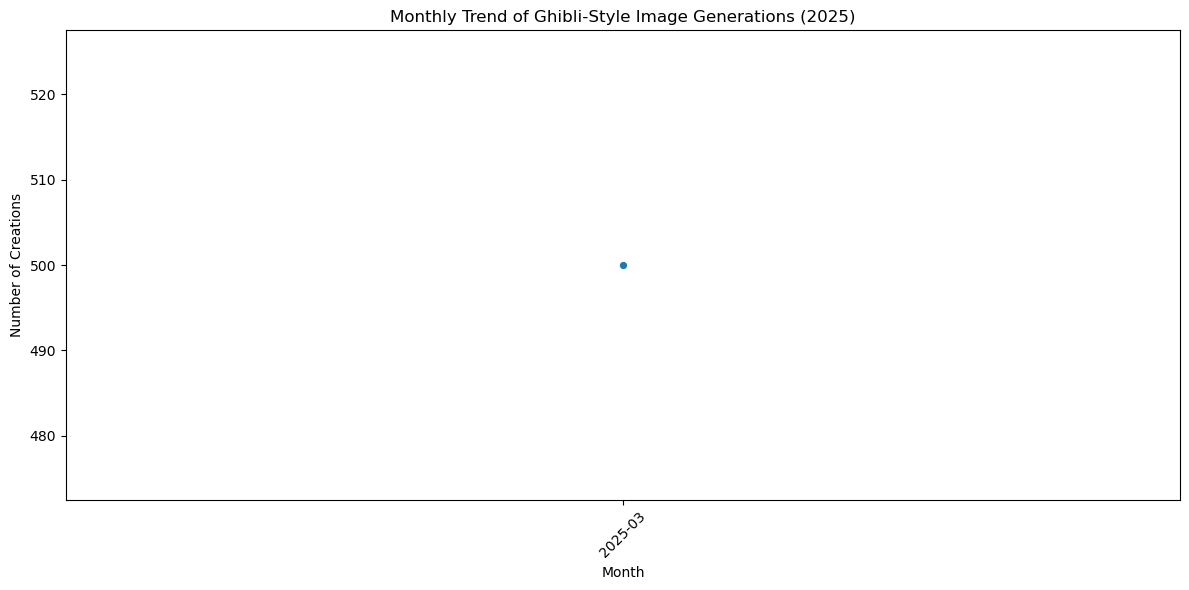

In [18]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['month'] = df['creation_date'].dt.to_period('M').astype(str)

monthly_trend = df.groupby('month').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='count', marker='o')
plt.title('Monthly Trend of Ghibli-Style Image Generations (2025)')
plt.xlabel('Month')
plt.ylabel('Number of Creations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

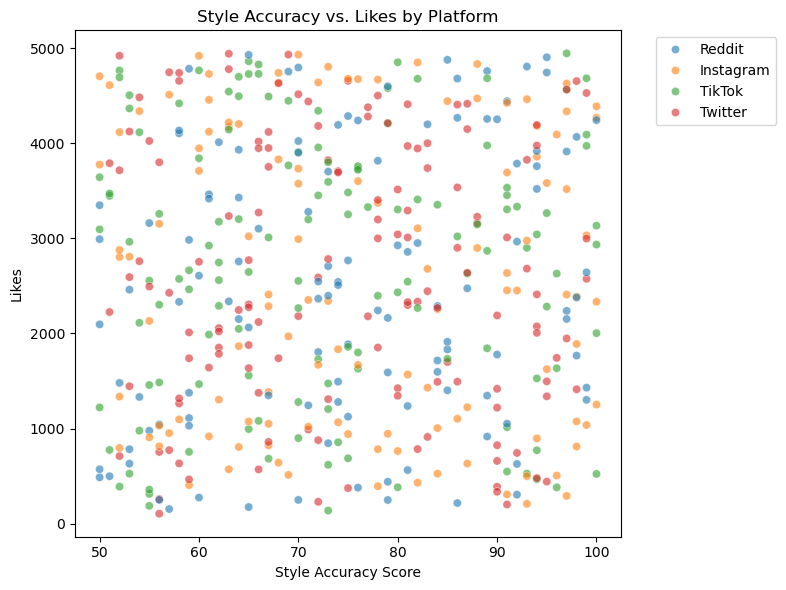

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='style_accuracy_score', y='likes', hue='platform', alpha=0.6)
plt.title('Style Accuracy vs. Likes by Platform')
plt.xlabel('Style Accuracy Score')
plt.ylabel('Likes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

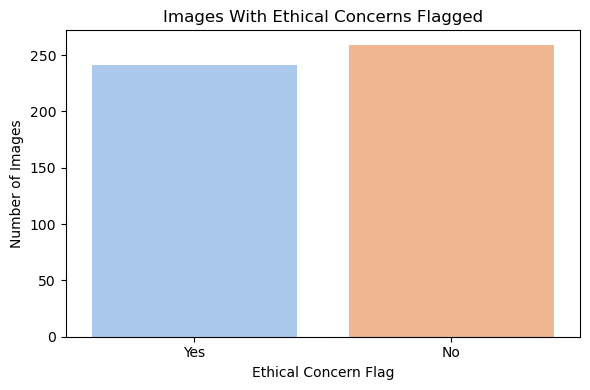

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ethical_concerns_flag', palette='pastel')
plt.title('Images With Ethical Concerns Flagged')
plt.xlabel('Ethical Concern Flag')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

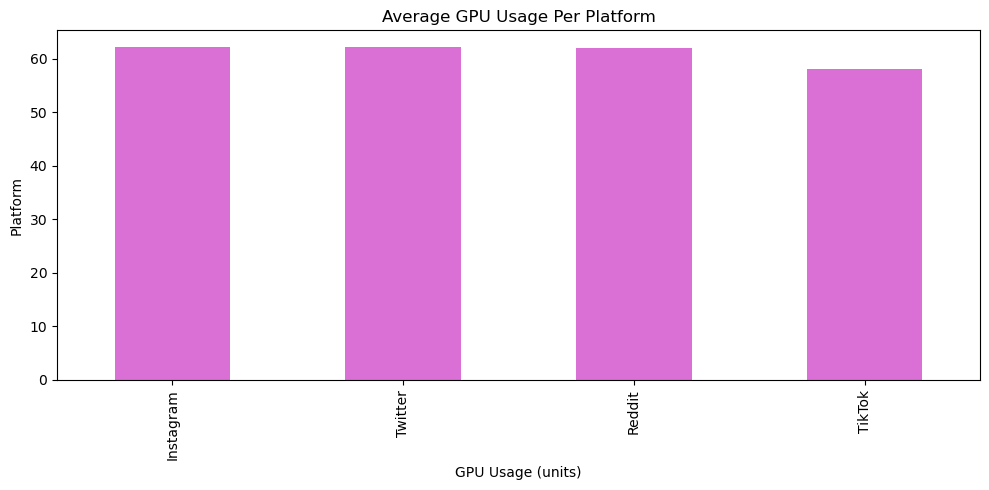

In [49]:
gpu_avg = df.groupby('platform')['gpu_usage'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
gpu_avg.plot(kind='bar', color='orchid')
plt.title('Average GPU Usage Per Platform')
plt.xlabel('GPU Usage (units)')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

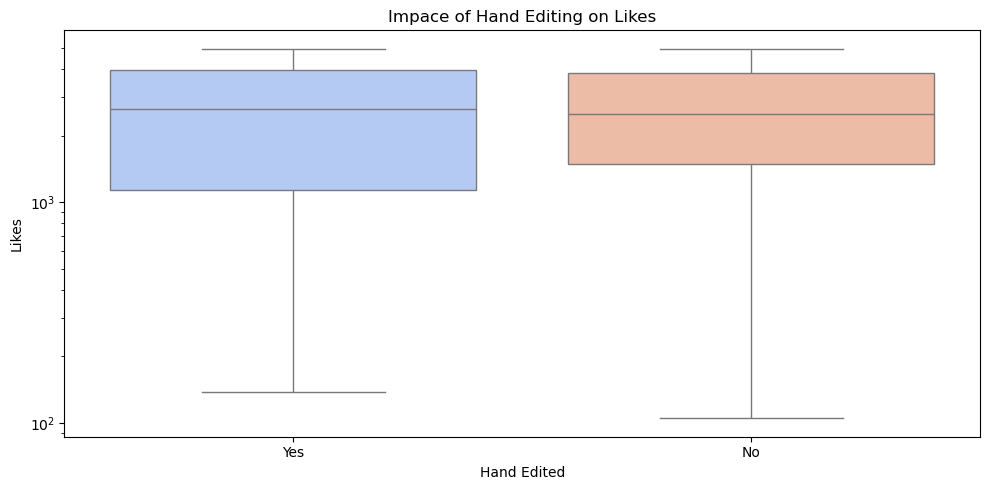

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='is_hand_edited', y='likes', palette='coolwarm')
plt.title('Impace of Hand Editing on Likes')
plt.xlabel('Hand Edited')
plt.ylabel('Likes')
plt.yscale('log')
plt.tight_layout()
plt.show()

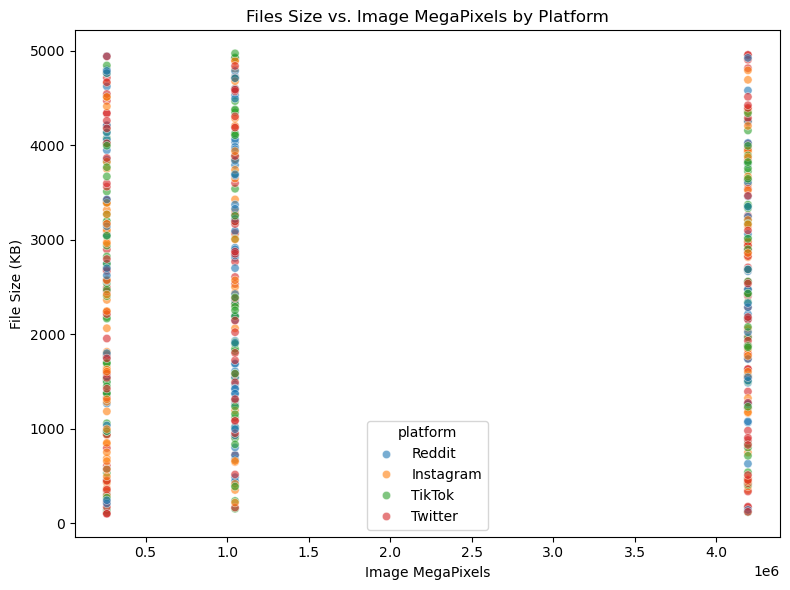

In [55]:
# split resolution to width and height
df[['width', 'height']] = df['resolution'].str.split('x', expand=True).astype(int)
df['megapixels'] = (df['width'] * df['height']) 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='megapixels', y='file_size_kb', hue='platform', alpha=0.6)
plt.title('Files Size vs. Image MegaPixels by Platform')
plt.xlabel('Image MegaPixels')
plt.ylabel('File Size (KB)')
plt.tight_layout()
plt.show()

In [57]:
df.describe().loc[['mean', 'min', 'max']].T

,mean,min,max
likes,2601.262,105.0,4944.0
shares,1040.182,13.0,1999.0
comments,506.872,5.0,998.0
generation_time,8.31778,1.54,14.99
gpu_usage,61.124,30.0,90.0
file_size_kb,2511.822,101.0,4973.0
style_accuracy_score,74.626,50.0,100.0
creation_date,2025-03-15 22:42:14.400000256,2025-03-01 00:00:00,2025-03-31 00:00:00
width,1205.248,512.0,2048.0
height,1205.248,512.0,2048.0


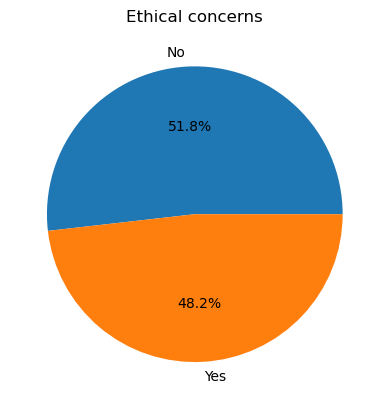

In [59]:
#plotting the piechart for ethicl concerns flag column.
ethic = df['ethical_concerns_flag'].value_counts()
plt.pie(ethic.values, labels=ethic.index, autopct='%1.1f%%')
plt.title('Ethical concerns')
plt.show()

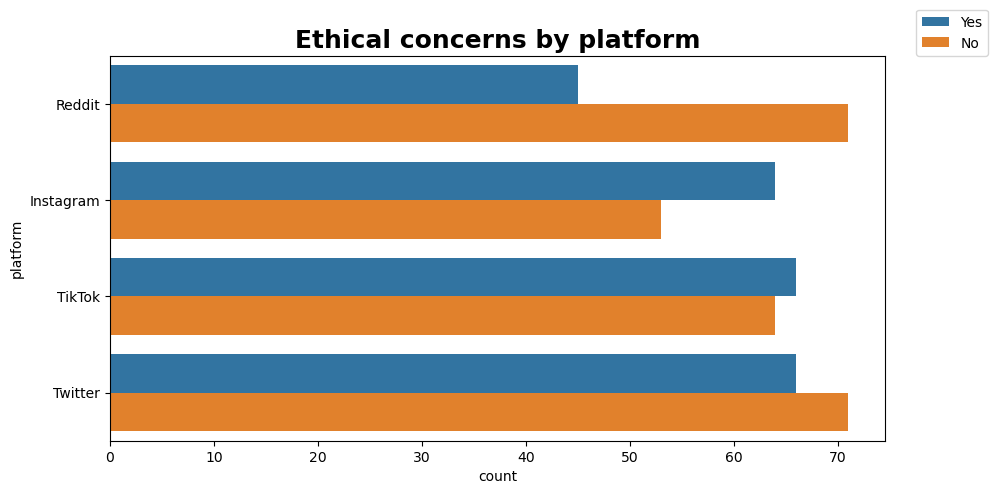

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(y="platform", hue="ethical_concerns_flag", data=df)
plt.title("Ethical concerns by platform", fontsize=18, fontweight="bold")
plt.legend(loc=(1.04, 1))
plt.show()

In [65]:
# popular prompts
df_reset = df.reset_index()
df_reset[["prompt", "platform", "likes"]].sort_values(by = 'likes', ascending=False).head(10)

,prompt,platform,likes
485,Ghibli-style mountain with floating islands,TikTok,4944
155,A lone traveler exploring an enchanted ruin,Twitter,4940
234,Anime-style train passing through a fantasy world,Twitter,4931
418,Anime-style train passing through a fantasy world,Instagram,4930
215,Ghibli-style night sky with glowing stars,Reddit,4928
428,Mysterious temple hidden in a magical forest,Twitter,4919
235,Mysterious temple hidden in a magical forest,Instagram,4918
29,Mysterious temple hidden in a magical forest,Reddit,4903
276,A lone traveler exploring an enchanted ruin,Reddit,4876
115,Studio Ghibli-inspired ocean with giant fish,TikTok,4861


In [67]:
df_reset[["prompt", "platform", "likes"]].sort_values(by = 'likes', ascending=True).head(10)

,prompt,platform,likes
398,Mysterious temple hidden in a magical forest,Twitter,105
206,Ghibli-style night sky with glowing stars,TikTok,138
184,Serene meadow with a tiny spirit creature,Reddit,154
354,"Cozy tea shop in a mystical town, Ghibli style",Reddit,175
30,Ghibli-style mountain with floating islands,TikTok,188
283,Serene meadow with a tiny spirit creature,Twitter,202
67,Ghibli-style village at sunset,Instagram,209
97,Ghibli-style night sky with glowing stars,Reddit,217
171,Serene meadow with a tiny spirit creature,Twitter,230
395,Ghibli-style night sky with glowing stars,Reddit,249


In [69]:
top10= df.sort_values(by=['likes'], ascending=False).head(10)

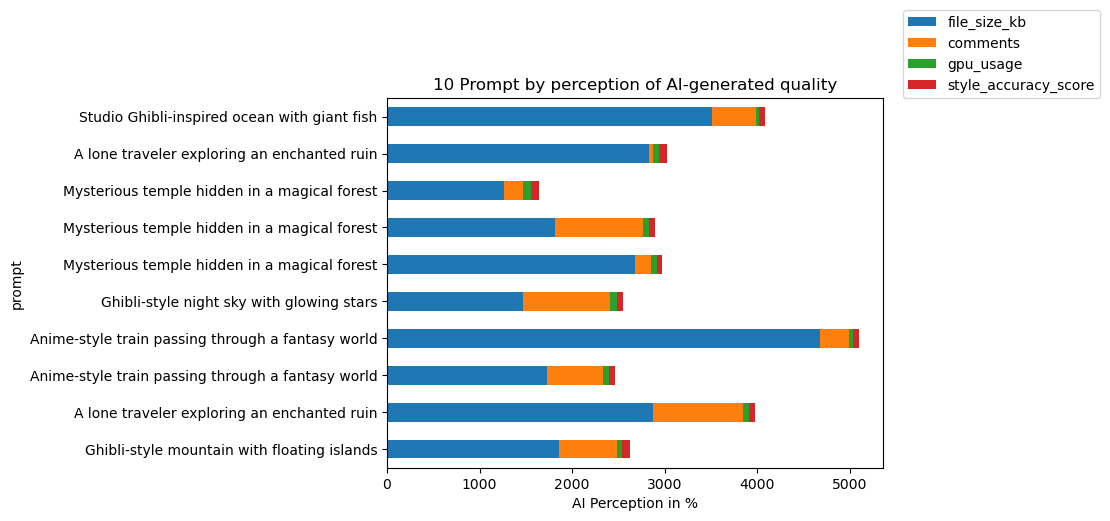

In [73]:
top10[['file_size_kb', 'comments', 'gpu_usage', 'style_accuracy_score', 'prompt']].plot.barh(x='prompt', stacked=True)
plt.legend(loc=(1.04, 1))
plt.xlabel("AI Perception in %")
plt.title('10 Prompt by perception of AI-generated quality');

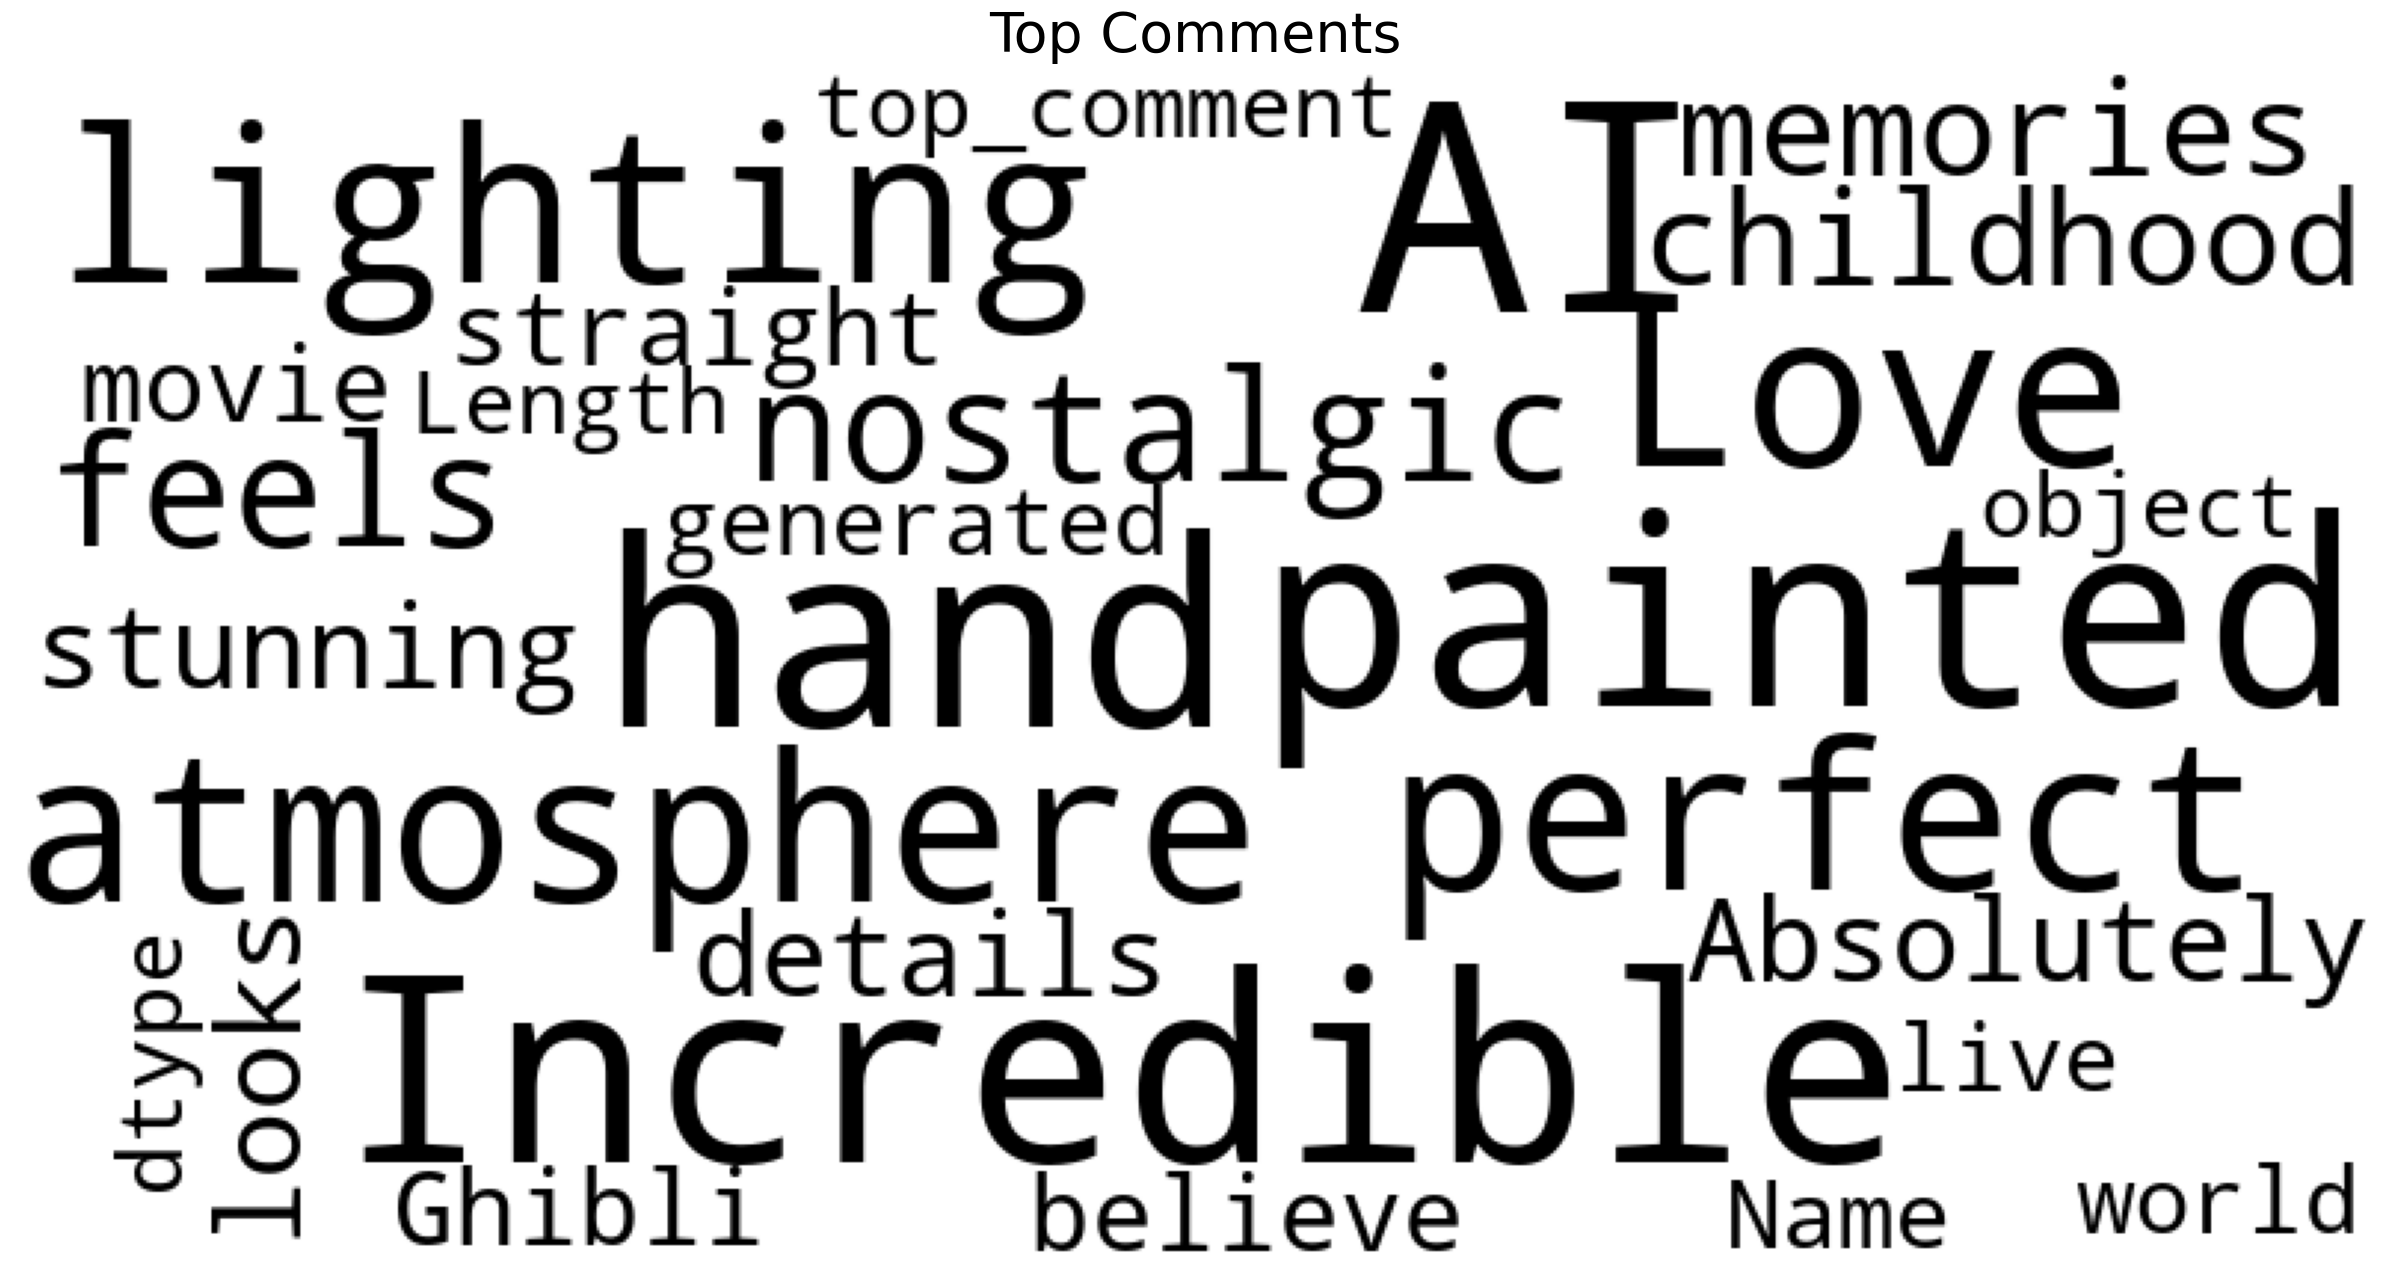

In [75]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    color_func=lambda *args, **kwargs: "black",      
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["top_comment"], title="Top Comments")

In [77]:
concerns = df[(df['ethical_concerns_flag']=='Yes')].reset_index(drop=True)
concerns.head()

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment,month,width,height,megapixels
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥...",2025-03,1024,1024,1048576
1,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...,2025-03,512,512,262144
2,d2fd397c-b851-489e-a362-ea006b559c9d,175d9509,Ghibli-style village at sunset,3715,115,949,Twitter,5.47,86,2320,1024x1024,52,No,Yes,2025-03-03,"So nostalgic, feels like childhood memories. 🎥...",2025-03,1024,1024,1048576
3,d43335f2-b6a4-4af5-8a2f-b65dc56a9cfe,eb9d2412,Ghibli-style night sky with glowing stars,2163,1365,326,Reddit,11.85,61,1508,512x512,79,Yes,Yes,2025-03-21,I'd love to live in this world! #3940,2025-03,512,512,262144
4,070b7d25-3aff-4a40-9804-ca54edadda14,61bc80e6,"Cozy tea shop in a mystical town, Ghibli style",4764,1969,862,TikTok,6.01,49,2578,512x512,52,Yes,Yes,2025-03-27,The colors are so soft and dreamy! ❤️ #8917,2025-03,512,512,262144


In [79]:
df.iloc[499, 15]

"I'd love to live in this world! #5615"